Iteration: 0, Loss: 3.2626, Accuracy: 0.0728
Iteration: 10, Loss: 2.3179, Accuracy: 0.1507
Iteration: 20, Loss: 2.1727, Accuracy: 0.2161
Iteration: 30, Loss: 2.0509, Accuracy: 0.2764
Iteration: 40, Loss: 1.9127, Accuracy: 0.3392
Iteration: 50, Loss: 1.7610, Accuracy: 0.3983
Iteration: 60, Loss: 1.6144, Accuracy: 0.4463
Iteration: 70, Loss: 1.4828, Accuracy: 0.4923
Iteration: 80, Loss: 1.3667, Accuracy: 0.5412
Iteration: 90, Loss: 1.2638, Accuracy: 0.5794
Iteration: 100, Loss: 1.1722, Accuracy: 0.6125
Iteration: 110, Loss: 1.0916, Accuracy: 0.6418
Iteration: 120, Loss: 1.0208, Accuracy: 0.6648
Iteration: 130, Loss: 0.9596, Accuracy: 0.6844
Iteration: 140, Loss: 0.9070, Accuracy: 0.7036
Iteration: 150, Loss: 0.8622, Accuracy: 0.7182
Iteration: 160, Loss: 0.8238, Accuracy: 0.7307
Iteration: 170, Loss: 0.7908, Accuracy: 0.7429
Iteration: 180, Loss: 0.7620, Accuracy: 0.7529
Iteration: 190, Loss: 0.7369, Accuracy: 0.7614
Iteration: 200, Loss: 0.7147, Accuracy: 0.7688
Iteration: 210, Loss: 0.

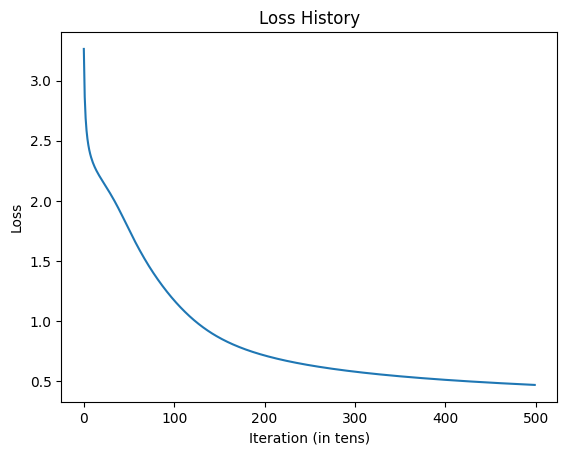

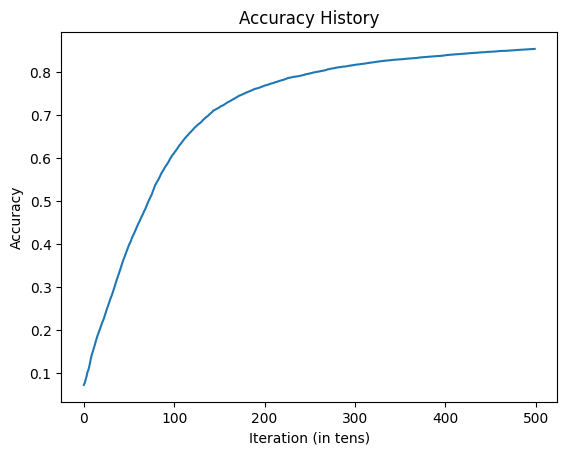

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Sigmoid`
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

# Tanh`
def tanh(Z):
    return np.tanh(Z)

def tanh_derivative(Z):
    return 1 - np.tanh(Z)**2


def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# ReLU`
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# One hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

# Prediction
def get_predictions(A2):
    return np.argmax(A2, 0)

# Accuracy calculation
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Cross-Entropy Loss
def cross_entropy_loss(A2, Y):
    m = Y.shape[0]
    one_hot_Y = one_hot(Y)
    cost = -np.sum(one_hot_Y * np.log(A2)) / m
    return cost

# Gradient descent with loss and accuracy history
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    m = X.shape[1]  # Number of training examples
    loss_history = []  # To store the loss at each iteration
    accuracy_history = []  # To store the accuracy at each iteration
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        loss = cross_entropy_loss(A2, Y)
        loss_history.append(loss)  # Record the loss
        
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, Y)
        accuracy_history.append(accuracy)  # Record the accuracy
        
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, m)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print(f"Iteration: {i}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
            
    return W1, b1, W2, b2, loss_history, accuracy_history

# Plot loss history
def plot_loss_history(loss_history):
    plt.plot(loss_history)
    plt.ylabel('Loss')
    plt.xlabel('Iteration (in tens)')
    plt.title('Loss History')
    plt.show()

# Save weights
def save_weights(W1, b1, W2, b2, filename='weights.txt'):
    with open(filename, 'w') as f:
        np.savetxt(f, W1)
        f.write("\n")
        np.savetxt(f, b1)
        f.write("\n")
        np.savetxt(f, W2)
        f.write("\n")
        np.savetxt(f, b2)

# Main execution
if __name__ == "__main__":
    # Load data
    data = pd.read_csv("train.csv")
    data = np.array(data)
    np.random.shuffle(data)

    # Split data
    half_split = len(data) // 2
    data_first_half = data[:half_split]
    train_size = int(0.8 * len(data_first_half))
    data_train = data_first_half[:train_size]
    data_validation = data_first_half[train_size:]

    # Prepare data
    X_train = data_train[:, 1:] / 255.
    Y_train = data_train[:, 0]
    X_val = data_validation[:, 1:] / 255.
    Y_val = data_validation[:, 0]

    # Training parameters
    alpha = 0.1
    iterations = 500

    # Train the model
    W1, b1, W2, b2, loss_history, accuracy_history = gradient_descent(X_train.T, Y_train, alpha, iterations)
    
    # Plot the loss history
    plot_loss_history(loss_history)

    # Plot accuracy history (new function)
    def plot_accuracy_history(accuracy_history):
        plt.plot(accuracy_history)
        plt.ylabel('Accuracy')
        plt.xlabel('Iteration (in tens)')
        plt.title('Accuracy History')
        plt.show()
    
    plot_accuracy_history(accuracy_history)
    
    # Save the model weights
    save_weights(W1, b1, W2, b2)
